In [375]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

We start with 3 survey datasets, we'll put most of our focus on 2015 as the 3 surveys are not connected.

In [376]:
t95 = pd.read_csv('1995tree.csv')

In [377]:
t05 = pd.read_csv('2005tree.csv')

C:\Users\shad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [378]:
t15 = pd.read_csv("2015tree.csv")

In [379]:
t15

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


Question1: Can we predict death given the other attributes, in order to get an idea of what might trees might be in danger? We can get somewhat of an idea about this by looking at the correlation. So first we clean the data, and then we find the correlation. In cleaning we'll remove columns that don't seem particularly useful, would be too difficult to use, or are not filled out for dead trees.

In [380]:
t15_abr = t15[['tree_dbh', 'curb_loc', 'status','health','root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other','borough']]

In [381]:
t15_abr = t15_abr[t15_abr.status != "Stump"]

In [382]:
t15_abr = t15_abr[((t15_abr.status == "Dead") | (t15_abr.index < 20000))]

In [383]:
#t15_abr = t15_abr.dropna()

In [384]:
t15_d = pd.get_dummies(t15_abr, columns = ["curb_loc","borough"])
t15_d = t15_d.replace("Yes",1)
t15_d = t15_d.replace("No",0)

In [385]:
t15_n = t15_d.replace("Alive", 1)
t15_n = t15_n.replace("Dead", 0)

# Correlated?

In [386]:
correlation_matrix = t15_n.corr()

<AxesSubplot:>

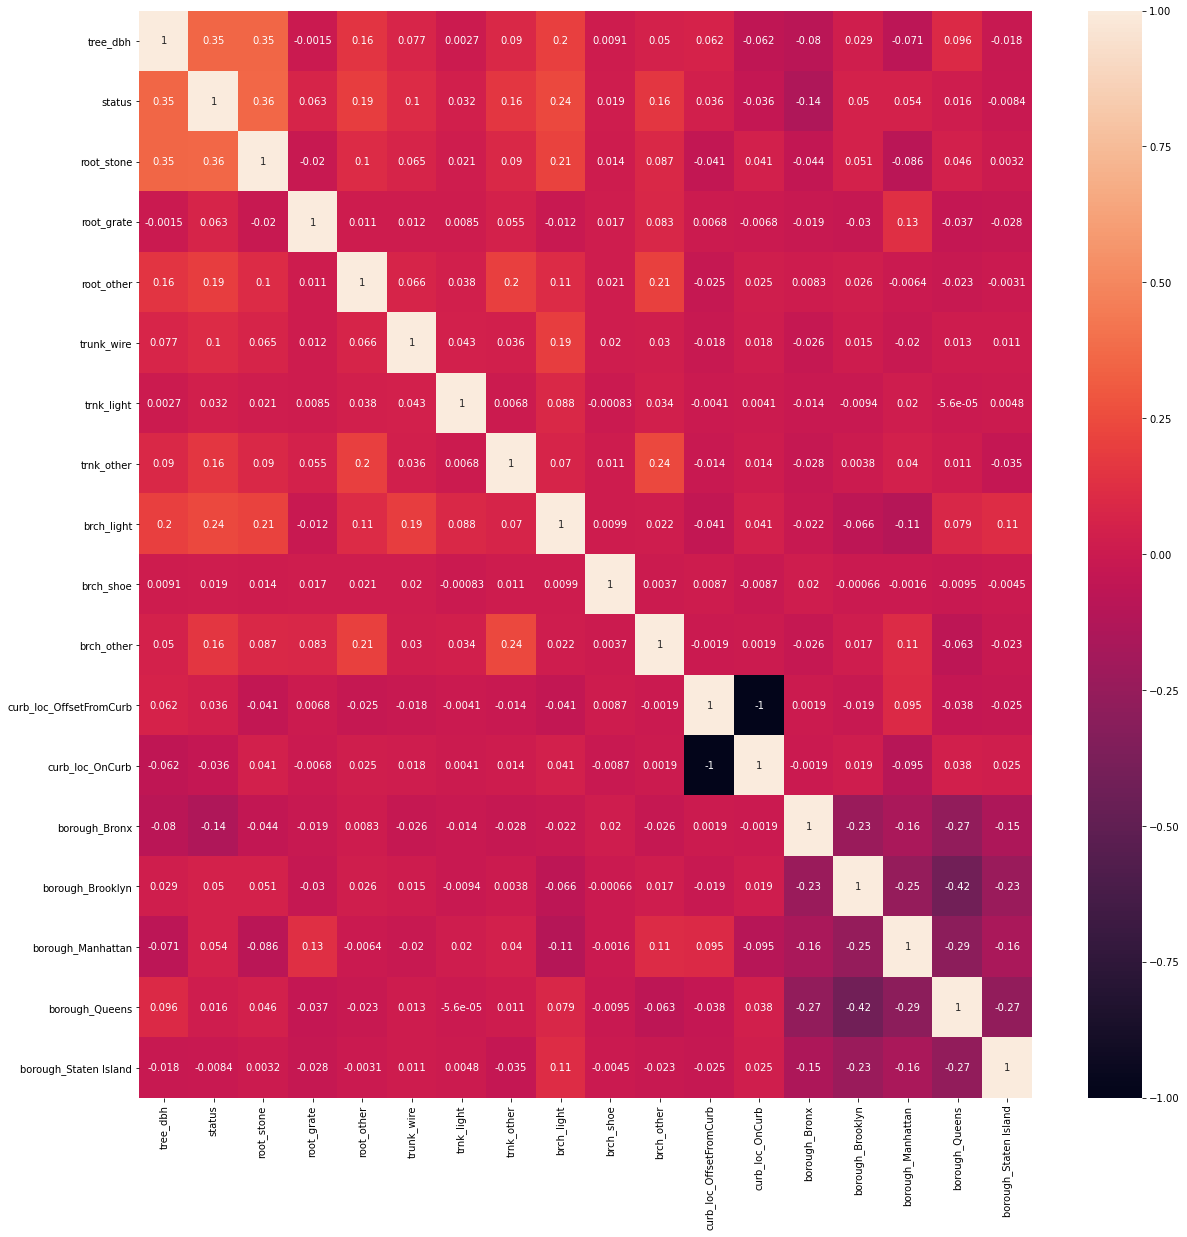

In [387]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(correlation_matrix, annot=True)

# Predictive?

In [388]:
train, test=train_test_split(t15_n)

In [389]:
trainx = train.drop(["status","health"],axis=1)

trainy = train.status

testx =test.drop(["status","health"],axis=1)
testy = test.status

In [390]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(trainx,trainy)

DecisionTreeClassifier(max_depth=4)

In [391]:
predicted = clf.predict(testx)

<AxesSubplot:>

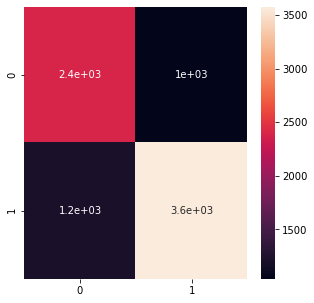

In [398]:
matplotlib.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(confusion_matrix(testy,predicted), annot=True)

In [399]:
accuracy_score(testy,predicted)

0.7264323075051697

Looking at our simplified decision tree we can see that a lot of placement depends on the tree diameter and there being roots around the stones. In general we can make a flow chart from this for if a tree is in danger of dying. If it has a diameter less than 4.5 and does not not have stones it may be in danger.

# Decision Tree Flow

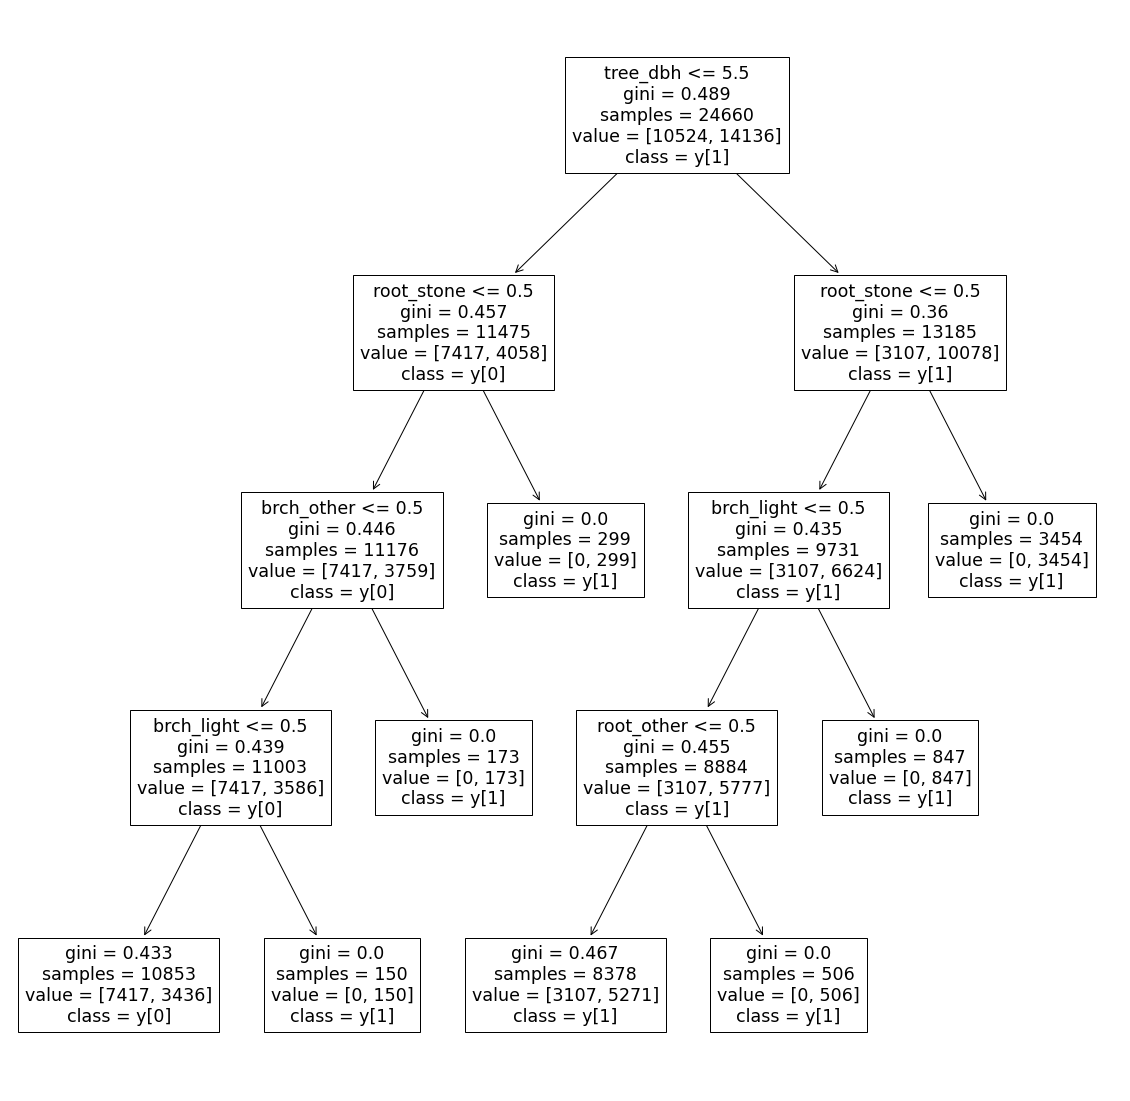

In [394]:
plot_tree(clf,feature_names = trainx.columns.values,class_names=True)
plt.show()

With this we have a simple description that can help classify our trees with ~75% accuracy

# Random Forest And Importance

In [401]:
from sklearn.ensemble import RandomForestClassifier

In [402]:
clf_ran = RandomForestClassifier()

In [403]:
clf_ran.fit(trainx,trainy)

RandomForestClassifier()

In [404]:
predran = clf_ran.predict(testx)

<AxesSubplot:>

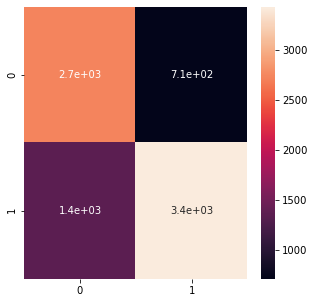

In [405]:
confusion_matrix(testy,predran)
sns.heatmap(confusion_matrix(testy,predran), annot=True)

In [406]:
accuracy_score(testy,predran)

0.7488140128938086

In [407]:
rand_importance = dict(zip(trainx.columns.values, clf_ran.feature_importances_))

{k: v for k, v in sorted(rand_importance.items(), key=lambda item: item[1], reverse=True)}

{'tree_dbh': 0.4283052312953183,
 'root_stone': 0.22884185504170515,
 'brch_light': 0.09991064462360708,
 'root_other': 0.05635689792509219,
 'brch_other': 0.04181989618083124,
 'trnk_other': 0.03835952877445062,
 'borough_Bronx': 0.027646488069621,
 'borough_Manhattan': 0.01687733410112449,
 'trunk_wire': 0.015355394834967069,
 'borough_Queens': 0.01162882949352521,
 'borough_Brooklyn': 0.009656798376929877,
 'curb_loc_OnCurb': 0.007046587298356867,
 'curb_loc_OffsetFromCurb': 0.00656201934717321,
 'root_grate': 0.006011106011076748,
 'borough_Staten Island': 0.005062796937314508,
 'trnk_light': 0.00044406149485419553,
 'brch_shoe': 0.00011453019405230805}

# ADA

In [408]:
from sklearn.ensemble import AdaBoostClassifier

In [409]:
clf_ada = AdaBoostClassifier()

In [410]:
clf_ada.fit(trainx,trainy)

AdaBoostClassifier()

In [411]:
pred_ada = clf_ada.predict(testx)

<AxesSubplot:>

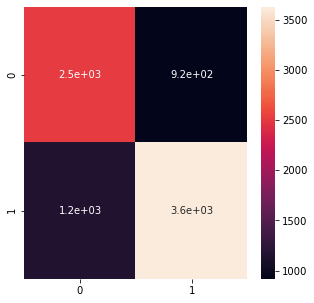

In [413]:
confusion_matrix(testy,pred_ada)
sns.heatmap(confusion_matrix(testy,pred_ada), annot=True)

In [414]:
accuracy_score(testy,pred_ada)

0.7477192555650164

In [415]:
sum(testy)

4784

In [416]:
from sklearn.linear_model import LogisticRegression

In [417]:
clf_log = LogisticRegression()

In [418]:
clf_log.fit(trainx,trainy)

C:\Users\shad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [419]:
pred_log = clf_log.predict(testx)

<AxesSubplot:>

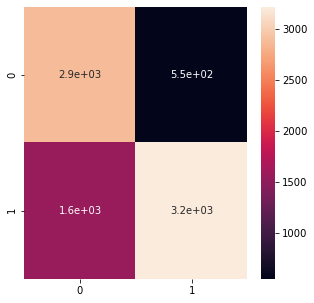

In [422]:
confusion_matrix(testy,pred_log)
sns.heatmap(confusion_matrix(testy,pred_log), annot=True)

In [423]:
accuracy_score(testy,pred_log)

0.7430969468434497

In [424]:
clf_log.decision_function(testx)

array([-0.96961579,  6.09022947,  5.47103445, ...,  0.08894474,
       -0.48598273, -0.15184231])

In [425]:
pred_prob = clf_log.predict_proba(testx)

In [426]:
pred_prob

array([[0.72504291, 0.27495709],
       [0.00225977, 0.99774023],
       [0.00418925, 0.99581075],
       ...,
       [0.47777846, 0.52222154],
       [0.61915961, 0.38084039],
       [0.53788781, 0.46211219]])

In [427]:
pred_weighted =  []
for val in pred_prob:
    if val[1] > 0.7:
        pred_weighted.append(1)
    else:
        pred_weighted.append(0)

<AxesSubplot:>

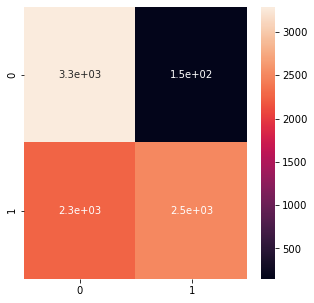

In [428]:
confusion_matrix(testy,pred_weighted)
sns.heatmap(confusion_matrix(testy,pred_weighted), annot=True)

In [429]:
accuracy_score(testy,pred_weighted)

0.7058751976645177

We'll now look at trying to predict into the future, however the first thing we need to do is find repeat trees. Specifically we need to look for the rows of t15 where spc_latin or spc_common line up, and where tree_dbh is smaller in t05, then t15, 

In [430]:


t05_match = t05[t05.address.isin(t15.address)]

In [431]:
single_tree_address = list(t05_match.address.value_counts()[t05_match.address.value_counts() ==1].index)

In [432]:
t05_usable = t05_match[t05_match.address.isin(single_tree_address) ]

In [433]:
health_dict = {}
for row in t15[t15.address.isin(single_tree_address)].iterrows():
    if row[1].address in single_tree_address:
        if row[1].address in health_dict:
            health_dict[row[1].address] = "nope"
        else:
            health_dict[row[1].address] = [row[1].status,row[1].health]

In [434]:
t05_usable['t15status'] =  [health_dict[x][0] for x in t05_usable.address]

C:\Users\shad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [435]:
t05_usable['t15health'] = [health_dict[x][1] for x in t05_usable.address]

C:\Users\shad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [436]:
fp_df = t05_usable[t05_usable.t15status != 'n']

In [437]:
fp_df = fp_df.replace("Stump","Dead")

In [438]:
fp_df_even = fp_df[((fp_df.t15status == "Dead") | (fp_df.index < 60000))]

In [439]:
tree_species = list(fp_df_even.spc_common.value_counts().index)

In [440]:
fp_df_even = fp_df_even.replace('Level',0)

In [441]:
fp_df_even =fp_df_even.replace('Above',1)

In [442]:
fp_df_even =fp_df_even.replace('Below',-1)

In [443]:
fp_df_even = fp_df_even[fp_df_even.status != "Dead"]

In [444]:
fp_df_even = fp_df_even.replace("Good", 0)
fp_df_even = fp_df_even.replace("Excellent",1)
fp_df_even =fp_df_even.replace("Poor", -1)

In [445]:
fp_df_even = fp_df_even.replace("No", 0)
fp_df_even = fp_df_even.replace("Yes", 1)

In [446]:
fdfx = fp_df_even[["tree_dbh", "pit_type",'soil_lvl','status','spc_latin','vert_other',
       'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 'horz_grate',
       'horz_plant', 'horz_other', 'sidw_crack', 'sidw_raise', 'wire_htap',
       'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard',
       'inf_wires', 'inf_paving', 'inf_outlet', 'inf_shoes', 'inf_lights',
       'inf_other', 'trunk_dmg']]

In [447]:
fdfy = fp_df_even.t15status

In [448]:
dfx = pd.get_dummies(fdfx)

In [449]:
dfx['t15status'] =  fdfy

In [450]:
trainp, testp = train_test_split(dfx)

In [451]:
trainpx = trainp.drop('t15status',axis=1)

In [452]:
trainpy = trainp.t15status

In [453]:
testpx = testp.drop('t15status',axis=1)

In [454]:
testpy = testp.t15status

In [455]:
model_dec = DecisionTreeClassifier(max_depth =4)

In [456]:
model_dec.fit(trainpx,trainpy)

DecisionTreeClassifier(max_depth=4)

In [457]:
ppred_dec = model_dec.predict(testpx)

<AxesSubplot:>

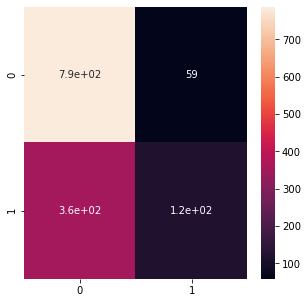

In [467]:
confusion_matrix(ppred_dec,testpy)
matplotlib.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(confusion_matrix(testpy,ppred_dec), annot=True)

In [459]:
accuracy_score(ppred_dec,testpy)

0.6860816944024206

In [460]:
sum(testpy=="Alive")

846

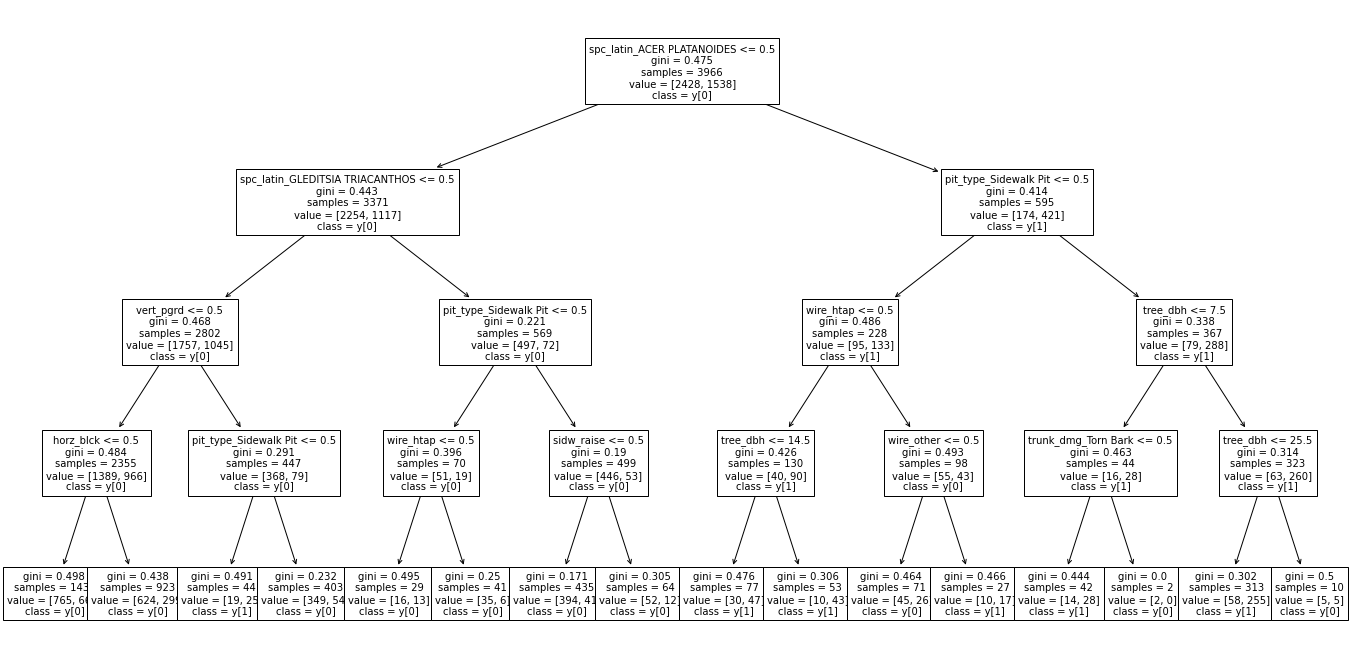

In [461]:
matplotlib.rcParams['figure.figsize'] = [24, 12]
plot_tree(model_dec,feature_names = trainpx.columns.values,class_names=True,fontsize=10)
plt.show()

In [462]:
model_ran = RandomForestClassifier()
model_ran.fit(trainpx,trainpy)

RandomForestClassifier()

In [463]:
ppred_ran  = model_ran.predict(testpx)

<AxesSubplot:>

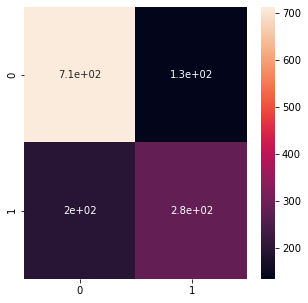

In [468]:
confusion_matrix(ppred_ran,testpy)
matplotlib.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(confusion_matrix(testpy,ppred_ran), annot=True)

In [469]:
accuracy_score(ppred_ran,testpy)

0.7511346444780636

In [470]:
rand_importance = dict(zip(trainpx.columns.values, model_ran.feature_importances_))

keep_vals = list({k: v for k, v in sorted(rand_importance.items(), key=lambda item: item[1], reverse=True)}.keys())
{k: v for k, v in sorted(rand_importance.items(), key=lambda item: item[1], reverse=True)}

{'tree_dbh': 0.20196396809403508,
 'spc_latin_ACER PLATANOIDES': 0.05866147917520995,
 'status': 0.04923956186366278,
 'soil_lvl': 0.04088983991115138,
 'wire_htap': 0.03620612710261444,
 'spc_latin_GLEDITSIA TRIACANTHOS': 0.03328735182511258,
 'sidw_crack': 0.029791478242988768,
 'horz_blck': 0.027005682145390644,
 'sidw_raise': 0.024065855776751067,
 'wire_prime': 0.023528079658472895,
 'vert_pgrd': 0.022025584851593918,
 'trunk_dmg_None': 0.021928252296960143,
 'wire_2nd': 0.020494115140847143,
 'wire_other': 0.01988605328888983,
 'pit_type_Sidewalk Pit': 0.019456704775201214,
 'trunk_dmg_Trunk Wound': 0.017958545849895768,
 'horz_plant': 0.016436362373096237,
 'pit_type_Lawn': 0.015800702905466237,
 'spc_latin_PYRUS CALLERYANA': 0.015019290877118834,
 'spc_latin_PLATANUS ACERIFOLIA': 0.014459722815485826,
 'inf_paving': 0.013658394699553008,
 'spc_latin_GINKGO BILOBA': 0.012927819989728547,
 'spc_latin_TILIA CORDATA': 0.012159000308189873,
 'spc_latin_ACER RUBRUM': 0.01147839183335

In [471]:
model_ada = AdaBoostClassifier()

In [472]:
model_ada.fit(trainpx,trainpy)

AdaBoostClassifier()

In [473]:
ppred_ada = model_ada.predict(testpx)

In [474]:
confusion_matrix(ppred_ada,testpy)

array([[700, 229],
       [146, 247]], dtype=int64)

In [475]:
accuracy_score(ppred_ada,testpy)

0.716338880484115

In [476]:
model_log = LogisticRegression()

In [477]:
model_log.fit(trainpx,trainpy)

C:\Users\shad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [478]:
ppredict_log = model_log.predict(testpx)

<AxesSubplot:>

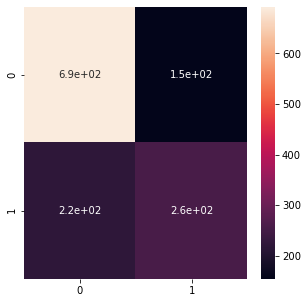

In [482]:
confusion_matrix(ppredict_log, testpy)
sns.heatmap(confusion_matrix(testpy,ppredict_log), annot=True)

In [480]:
accuracy_score(ppredict_log, testpy)

0.716338880484115

In [371]:
model_log.predict_proba(testpx)

array([[0.65704988, 0.34295012],
       [0.52589343, 0.47410657],
       [0.84368278, 0.15631722],
       ...,
       [0.75600444, 0.24399556],
       [0.33357129, 0.66642871],
       [0.7978952 , 0.2021048 ]])

In [317]:
rand2 = RandomForestClassifier()
rand2.fit(trainpx[keep_vals],trainpy)

RandomForestClassifier()

In [318]:
rand2pred = rand2.predict(testpx[keep_vals])

In [319]:
confusion_matrix(rand2pred,testpy)

array([[668, 215],
       [136, 303]], dtype=int64)

In [320]:
accuracy_score(rand2pred,testpy)

0.7344931921331316

In [322]:
from sklearn.decomposition import PCA

In [323]:
pc = PCA()

In [324]:
pc.fit(trainpx)

PCA()

In [326]:
pca_trans = pc.transform(trainpx)

In [338]:
pca_trans.shape

(3966, 103)

In [339]:
rand3 =  RandomForestClassifier()
rand3.fit(pca_trans[:,:5],trainpy)

RandomForestClassifier()

In [340]:
test_pca = pc.transform(testpx)

In [342]:
pca_pred = rand3.predict(test_pca[:,:5])

In [343]:
confusion_matrix(pca_pred,testpy)

array([[653, 276],
       [151, 242]], dtype=int64)

In [344]:
accuracy_score(pca_pred,testpy)

0.6770045385779122

In [352]:
pc.components_[1]

array([-2.26372381e-02,  1.37511785e-01,  1.29405708e-01, -1.51051437e-02,
       -6.06827534e-02, -6.72503429e-03, -7.49219844e-03, -3.22086357e-01,
       -9.90956757e-03, -3.18739797e-02, -5.22791038e-03, -1.01408108e-01,
        2.28206801e-02,  2.80104669e-01,  2.49444817e-01,  2.85254681e-01,
        1.62061657e-01, -2.28209282e-02, -1.25090051e-02,  1.33380658e-02,
       -2.78854204e-02, -5.38117459e-03, -2.11523379e-03, -1.15599433e-02,
       -2.08799035e-02,  7.55390318e-02,  4.00312747e-01, -4.75851778e-01,
        4.08708684e-03,  3.44251772e-03,  3.95563412e-03,  8.37240148e-02,
        9.69271006e-03,  5.01426288e-03,  2.56877287e-02,  1.05095680e-02,
        9.72218928e-03,  1.30898978e-03,  1.01249418e-03,  9.16081507e-05,
        7.72734554e-04, -7.23461683e-05, -3.97025163e-04,  2.38843028e-04,
       -2.64454305e-04,  1.12836174e-04,  1.08631806e-03,  4.33691597e-03,
        4.71718965e-04,  4.74503881e-04,  6.91557644e-04, -5.01327447e-03,
        5.24500839e-04, -

In [351]:
trainpx

,tree_dbh,soil_lvl,status,vert_other,vert_pgrd,vert_tgrd,vert_wall,horz_blck,horz_grate,horz_plant,horz_other,sidw_crack,sidw_raise,wire_htap,wire_prime,wire_2nd,wire_other,inf_canopy,inf_guard,inf_wires,inf_paving,inf_outlet,inf_shoes,inf_lights,inf_other,pit_type_Continuous Pit,pit_type_Lawn,pit_type_Sidewalk Pit,spc_latin_ACER CAMPESTRE,spc_latin_ACER GINNALA,spc_latin_ACER PALMATUM,spc_latin_ACER PLATANOIDES,spc_latin_ACER PLATANOIDES CRIMSON KING,spc_latin_ACER PSEUDOPLATANUS,spc_latin_ACER RUBRUM,spc_latin_ACER SACCHARINUM,spc_latin_ACER SACCHARUM,spc_latin_ACER SPECIES,spc_latin_AESCULUS HIPPOCASTANUM,spc_latin_AILANTHUS ALTISSIMA,spc_latin_BETULA SPECIES,spc_latin_CARPINUS BETULUS,spc_latin_CARPINUS CAROLINIANA,spc_latin_CATALPA,spc_latin_CELTIS OCCIDENTALIS,spc_latin_CERCIDIPHYLLUM JAPONICUM,spc_latin_CERCIS CANADENSIS,spc_latin_CORNUS FLORIDA,spc_latin_CORNUS KOUSA,spc_latin_CRATAEGUS SPECIES,spc_latin_FRAXINUS AMERICANA,spc_latin_FRAXINUS PENNSYLVANICA,spc_latin_FRAXINUS SPECIES,spc_latin_GINKGO BILOBA,spc_latin_GLEDITSIA TRIACANTHOS,spc_latin_GYMNOCLADUS DIOICUS,spc_latin_JUGLANS NIGRA,spc_latin_KOELREUTERIA PANICULATA,spc_latin_LIQUIDAMBAR STYRACIFLUA,spc_latin_LIRIODENDRON TULIPIFERA,spc_latin_MALUS PUMILA,spc_latin_MALUS SPECIES,spc_latin_METASEQUOIA GLYPTOSTROBOIDES,spc_latin_MORUS,spc_latin_PINUS SPECIES,spc_latin_PINUS STROBUS,spc_latin_PLATANUS ACERIFOLIA,spc_latin_POPLAR SPECIES,spc_latin_POPULUS DELTOIDES,spc_latin_POPULUS NIGRA,spc_latin_PRUNUS CERASIFERA,spc_latin_PRUNUS SPECIES,spc_latin_PRUNUS VIRGINIANA SHUBERT,spc_latin_PYRUS CALLERYANA,spc_latin_QUERCUS ACUTISSIMA,spc_latin_QUERCUS ALBA,spc_latin_QUERCUS BICOLOR,spc_latin_QUERCUS PALUSTRIS,spc_latin_QUERCUS PHELLOS,spc_latin_QUERCUS ROBUR,spc_latin_QUERCUS RUBRA,spc_latin_QUERCUS SPECIES,spc_latin_ROBINIA PSEUDOACACIA,spc_latin_SALIX MATSUDANA,spc_latin_SALIX SPECIES,spc_latin_STYPHNOLOBIUM JAPONICUM,spc_latin_SYRINGA RETICULATA,spc_latin_TAXODIUM DISTICHUM,spc_latin_TILIA AMERICANA,spc_latin_TILIA CORDATA,spc_latin_TILIA SPECIES,spc_latin_TILIA TOMENTOSA,spc_latin_ULMUS AMERICANA,spc_latin_ULMUS PARVIFOLIA,spc_latin_ULMUS PROCERA,spc_latin_ULMUS PUMILA,spc_latin_ULMUS SPECIES,spc_latin_UNKNOWN,spc_latin_ZELKOVA SERRATA,trunk_dmg_Cavity,trunk_dmg_None,trunk_dmg_Torn Bark,trunk_dmg_Trunk Wound
12159,7,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30734,9,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51178,12,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
52732,19,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9833,7,-1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504014,12,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [54]:
t05[t05.spc_latin.isin(t05.spc_latin.unique()[~pd.Series(t05.spc_latin.str.lower().unique()).isin(t15.spc_latin.str.lower())])]

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,vert_other,vert_pgrd,vert_tgrd,vert_wall,horz_blck,horz_grate,horz_plant,horz_other,sidw_crack,sidw_raise,wire_htap,wire_prime,wire_2nd,wire_other,inf_canopy,inf_guard,inf_wires,inf_paving,inf_outlet,inf_shoes,inf_lights,inf_other,trunk_dmg,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes,Cavity,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"
5,592378,2005,21,2361 EAST 72 STREET,Front,Sidewalk Pit,Level,Poor,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.616093,-73.902039,1011447,163751,5,706.0,3238181.0,3.084500e+09,"(40.61609332, -73.9020386)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592366,1184739,2005,9,60 LEWISTON STREET,Front,Lawn,Level,Good,PRUNUS SPECIES,"CHERRY, OTHER",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.586318,-74.148725,942941,152923,592366,27704.0,5037775.0,5.023710e+09,"(40.58631814, -74.14872539)"
592367,1184740,2005,9,62 LEWISTON STREET,Front,Lawn,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.586260,-74.148797,942921,152902,592367,27704.0,5037776.0,5.023710e+09,"(40.58626041, -74.14879727)"
592369,1184742,2005,5,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.585802,-74.149156,942821,152735,592369,27704.0,5037737.0,5.023710e+09,"(40.58580156, -74.14915628)"
592370,1184743,2005,9,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten I

In [107]:
t05['rough_lat'] = [str(x) for x in round(t05.latitude,2)]

In [108]:
t05['rough_long'] = [str(x) for x in round(t05.longitude,2)]

In [109]:
t15['rough_lat'] = [str(x) for x in round(t15.latitude,2)]

In [110]:
t15['rough_long'] = [str(x) for x in round(t15.longitude,2)]

In [112]:
t05['rough_coor'] = t05['rough_lat']+ t05["rough_long"]

In [113]:
t05['rough_coor']

0          40.63-74.0
1          40.62-73.9
2          40.62-73.9
3          40.62-73.9
4          40.62-73.9
             ...     
592367    40.59-74.15
592368    40.59-74.15
592369    40.59-74.15
592370    40.59-74.15
592371    40.59-74.15
Name: rough_coor, Length: 592372, dtype: object

If the same species name, and the same rough latitude and longitude, maybe it's good?

In [116]:
t05.rough_coor.value_counts()

0.00.0         8840
40.54-74.2     2062
40.74-73.71    2056
40.73-73.8     2004
40.77-73.96    1990
               ... 
40.64-73.74       1
40.57-73.95       1
40.78-73.86       1
40.69-74.01       1
40.89-73.8        1
Name: rough_coor, Length: 877, dtype: int64

same species name, same latitude and longitude, same address? Diameter should not be smaller.

In [104]:
t05.join(t15, how='inner', on = "rough_lat",lsuffix ="2005",rsuffix="2015")

C:\Users\shad\AppData\Roaming\Python\Python37\site-packages\pandas\core\reshape\merge.py:1145: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,rough_lat,OBJECTID,cen_year,tree_dbh2005,address2005,tree_loc,pit_type,soil_lvl,status2005,spc_latin2005,spc_common2005,vert_other,vert_pgrd,vert_tgrd,vert_wall,horz_blck,horz_grate,horz_plant,horz_other,sidw_crack,sidw_raise,wire_htap,wire_prime,wire_2nd,wire_other,inf_canopy,inf_guard,inf_wires,inf_paving,inf_outlet,inf_shoes,inf_lights,inf_other,trunk_dmg,zipcode,zip_city2005,cb_num,borocode2005,boroname,cncldist2005,st_assem2005,st_senate2005,nta2005,nta_name2005,boro_ct2005,state2005,latitude2005,longitude2005,x_sp2005,y_sp2005,objectid_1,census tract2005,bin2005,bbl2005,Location 1,rough_lat2005,rougn_long,rough_long2005,rough_coor,tree_id,block_id,created_at,tree_dbh2015,stump_diam,curb_loc,status2015,health,spc_latin2015,spc_common2015,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address2015,postcode,zip_city2015,community board,borocode2015,borough,cncldist2015,st_assem2015,st_senate2015,nta2015,nta_name2015,boro_ct2015,state2015,latitude2015,longitude2015,x_sp2015,y_sp2015,council district,census tract2015,bin2015,bbl2015,rough_lat2015,rough_long2015
51,0.0,641141,2005,6,no address no address,Front,Continuous Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Trunk Wound,0,NaN,0,1,Manhattan,0,0,0,,,NaN,New York,0.0,0.0,0,0,48768,NaN,NaN,NaN,"(0.0, 0.0)",0.0,0.0,0.0,0 40.63\n1 40.62\n2 40...,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,40.72,-73.84
86,0.0,641142,2005,6,no address no address,Front,Continuous Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,0,NaN,0,1,Manhattan,0,0,0,,,NaN,New York,0.0,0.0,0,0,48769,NaN,NaN,NaN,"(0.0, 0.0)",0.0,0.0,0.0,0 40.63\n1 40.62\n2 40...,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,40.72,-73.84
122,0.0,641278,2005,20,24 Sycamores P EAST 61 STREET,Front,Continuous Pit,Level,Excellent,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,0,NaN,0,1,Manhattan,0,0,0,,,NaN,New York,0.0,0.0,0,0,48905,NaN,NaN,NaN,"(0.0, 0.0)",0.0,0.0,0.0,0 40.63\n1 40.62\n2 40...,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,40.72,-73.84
318,0.0,641279,2005,15,24 Sycamores P EAST 61 STREET,Front,Continuous Pit,Level,Excellent,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,0,NaN,0,1,Manhattan,0,0,0,,,NaN,New York,0.0,0.0,0,0,48906,NaN,NaN,NaN,"(0.0, 0.0)",0.0,0.0,0.0,0 40.63\n1 40.62\n2 40...,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,40.72,-73.84
544,0.0,641369,2005,3,GreenStreets Green Streets Island,Median,Lawn,Above,Dead,Unknown Dead,Unknown Dead,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,,0,NaN,0,1,Manhattan,0,0,0,,,NaN,New York,0.0,0.0,0,0,48996,NaN,NaN,NaN,"(0.0, 0.0)",0.0,0.0,0.0,0 40.63\n1 40

In [56]:
import nltk
nltk.edit_distance("humpty", "dumpty")

1

In [68]:
t05species = t05.spc_latin.dropna().str.lower().unique()

In [69]:
t15species = t15.spc_latin.dropna().str.lower().unique()

In [70]:
t15species

array(['acer rubrum', 'quercus palustris',
       'gleditsia triacanthos var. inermis', 'tilia americana',
       'platanus x acerifolia', 'ginkgo biloba', 'quercus phellos',
       'acer pseudoplatanus', 'acer ginnala', 'acer campestre',
       'ulmus americana', 'fraxinus', 'malus', 'acer saccharinum',
       'corylus colurna', 'prunus serotina', 'juniperus virginiana',
       'acer platanoides', 'liriodendron tulipifera',
       'quercus acutissima', 'quercus bicolor', 'styphnolobium japonicum',
       'chionanthus retusus', 'magnolia grandiflora',
       'liquidambar styraciflua', 'pyrus calleryana', 'quercus coccinea',
       'chamaecyparis thyoides', 'quercus velutina', 'zelkova serrata',
       'quercus alba', 'aesculus glabra', 'quercus rubra',
       'tilia tomentosa', 'carya glabra', 'cladrastis kentukea', 'morus',
       'pseudotsuga menziesii', 'lagerstroemia', 'sassafras albidum',
       'prunus', 'picea', 'ulmus parvifolia', 'aesculus hippocastanum',
       'ilex', 'tilia

In [74]:
species_key  = {}
for species5 in t05species:
    d = 10000
    spec = ""
    for species15 in t15species:
        
        cur_dist = nltk.edit_distance(species5,species15)
        if cur_dist < d:
            d= cur_dist
            spec = species15
    
    species_key[species5] = spec
    

{'pyrus calleryana': 'pyrus calleryana',
 'platanus acerifolia': 'platanus x acerifolia',
 'acer platanoides          crimson king': "acer platanoides 'crimson king'",
 'crataegus species': 'crataegus',
 'acer platanoides': 'acer platanoides',
 'gleditsia triacanthos': 'gleditsia triacanthos var. inermis',
 'tilia cordata': 'tilia cordata',
 'unknown': 'prunus',
 'ginkgo biloba': 'ginkgo biloba',
 'koelreuteria paniculata': 'koelreuteria paniculata',
 'cornus florida': 'cornus florida',
 'acer pseudoplatanus': 'acer pseudoplatanus',
 'acer rubrum': 'acer rubrum',
 'prunus cerasifera': 'prunus cerasifera',
 'zelkova serrata': 'zelkova serrata',
 'quercus palustris': 'quercus palustris',
 'fraxinus pennsylvanica': 'fraxinus pennsylvanica',
 'syringa reticulata': 'syringa reticulata',
 'prunus species': 'prunus serotina',
 'acer ginnala': 'acer ginnala',
 'styphnolobium japonicum': 'styphnolobium japonicum',
 'cercidiphyllum japonicum': 'cercidiphyllum japonicum',
 'quercus rubra': 'querc

In [61]:
t05species.shape

(169,)

In [62]:
t15species.shape

(133,)

In [34]:
t05[t05.address.isin(t15.address)]

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,vert_other,vert_pgrd,vert_tgrd,vert_wall,horz_blck,horz_grate,horz_plant,horz_other,sidw_crack,sidw_raise,wire_htap,wire_prime,wire_2nd,wire_other,inf_canopy,inf_guard,inf_wires,inf_paving,inf_outlet,inf_shoes,inf_lights,inf_other,trunk_dmg,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,None,11219,Brooklyn,312,3,Brooklyn,44,48,17,BK88,Borough Park,3021600.0,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes,Cavity,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592367,1184740,2005,9,62 LEWISTON STREET,Front,Lawn,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.586260,-74.148797,942921,152902,592367,27704.0,5037776.0,5.023710e+09,"(40.58626041, -74.14879727)"
592368,1184741,2005,7,68 LEWISTON STREET,Front,Lawn,Level,Good,ACER SACCHARINUM,"MAPLE, SILVER",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.586090,-74.149013,942861,152840,592368,27704.0,5037778.0,5.023710e+09,"(40.58608995, -74.14901291)"
592369,1184742,2005,5,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN,New York,40.585802,-74.149156,942821,152735,592369,27704.0,5037737.0,5.023710e+09,"(40.58580156, -74.14915628)"
592370,1184743,2005,9,69 TRAVIS AVENUE,Side,Lawn,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,10314,Staten Island,502,5,5,50,63,24,SI24,Todt Hill-Eme

In [40]:
t15[t15.address=="1139 57 STREET"]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
427386,642437,228314,07/27/2016,8,0,OnCurb,Alive,Good,Prunus,cherry,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1139 57 STREET,11219,Brooklyn,312,3,Brooklyn,44,48,17,BK88,Borough Park,3021600,New York,40.632592,-74.000079,984228.1129,169746.6369,44.0,216.0,3140038.0,3.056890e+09
429937,642436,228314,07/27/2016,8,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,1or2,Harmful,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1139 57 STREET,11219,Brooklyn,312,3,Brooklyn,44,48,17,BK88,Borough Park,3021600,New York,40.632562,-74.000030,984241.7201,169735.7928,44.0,216.0,3140038.0,3.056890e+09
